In [1]:
from arbocensus_expert_system.image_loader import ImageLoader
from arbocensus_expert_system.tree_reviewer import TreeReviewer
from arbocensus_expert_system.models.mask_extractor_sam import MaskExtractorSAM
from arbocensus_expert_system.models.monocular_depth_dam import MonocularDepthDAM
from arbocensus_expert_system.models.gdino_object_detector import GDinoObjectDetector
from arbocensus_expert_system.models.tree_classifier_resnet import TreeClassifierResnet
from arbocensus_expert_system.config import get_env

c:\Users\jflir\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import numpy as np 

#get a random image from a folder path
def get_random_image(folder_path):
    files = os.listdir(folder_path)
    file = files[np.random.randint(len(files))]
    print(file)
    return file

### Step 1: Define The Chosen Strategies 
The models take some time to load is best to load them before the rest of the application

In [3]:
# Define the models
mask_extractor = MaskExtractorSAM()
depth_mapper = MonocularDepthDAM()
object_classifier = GDinoObjectDetector()
tree_classifier = TreeClassifierResnet()

c:\Users\jflir\AppData\Local\Programs\Python\Python312\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

In [4]:
from arbocensus_expert_system.strategies.tree.first_tree_segmenter import FirstTreeSegmenter
from arbocensus_expert_system.strategies.card.card_segmentation_strategy import CardSegmentationStrategy

tree_segmentation_strategy = FirstTreeSegmenter(mask_extractor, 
                                                    depth_mapper, 
                                                    object_classifier,
                                                    tree_classifier)
card_segmentation_strategy = CardSegmentationStrategy(mask_extractor, 
                                                    object_classifier)

### Step 2: Define The Tree Reviewer and Evaluate an Image

In [5]:
folder_path = get_env('TEST_TREE_IMAGES_PATH')
image_loader = ImageLoader(folder_path, 50, 0)
tree_reviewer = TreeReviewer(tree_segmentation_strategy, card_segmentation_strategy)

Number of images: 109


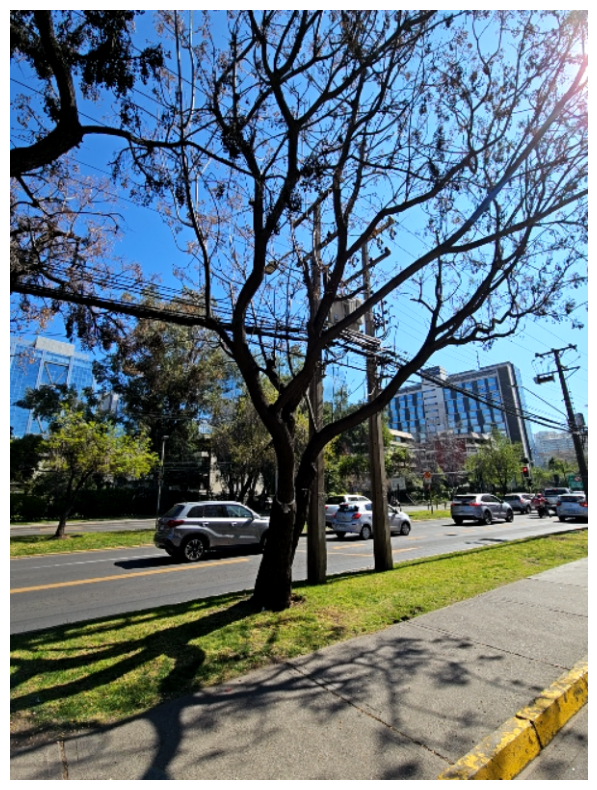

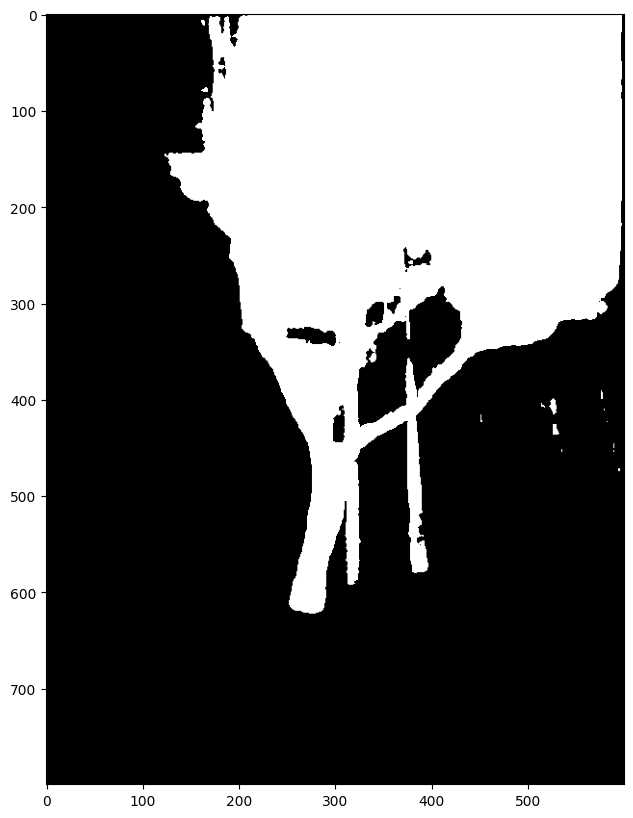

c:\Users\jflir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jflir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


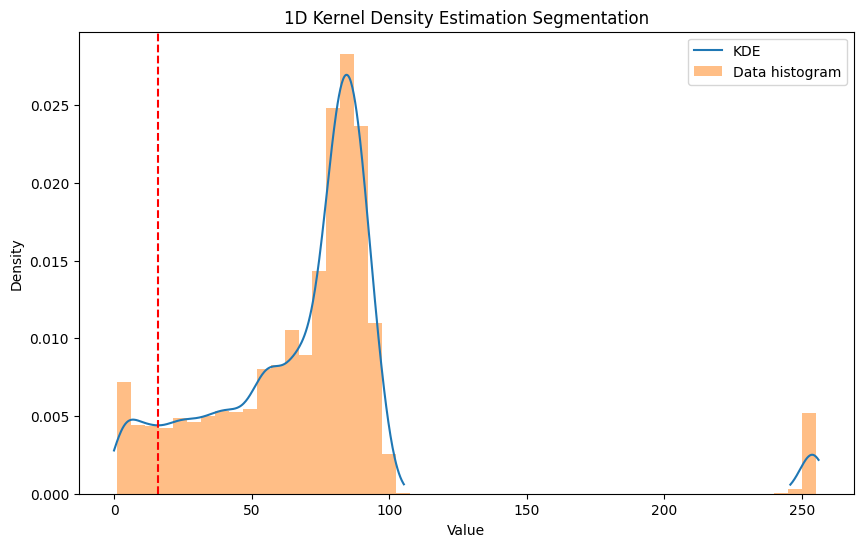

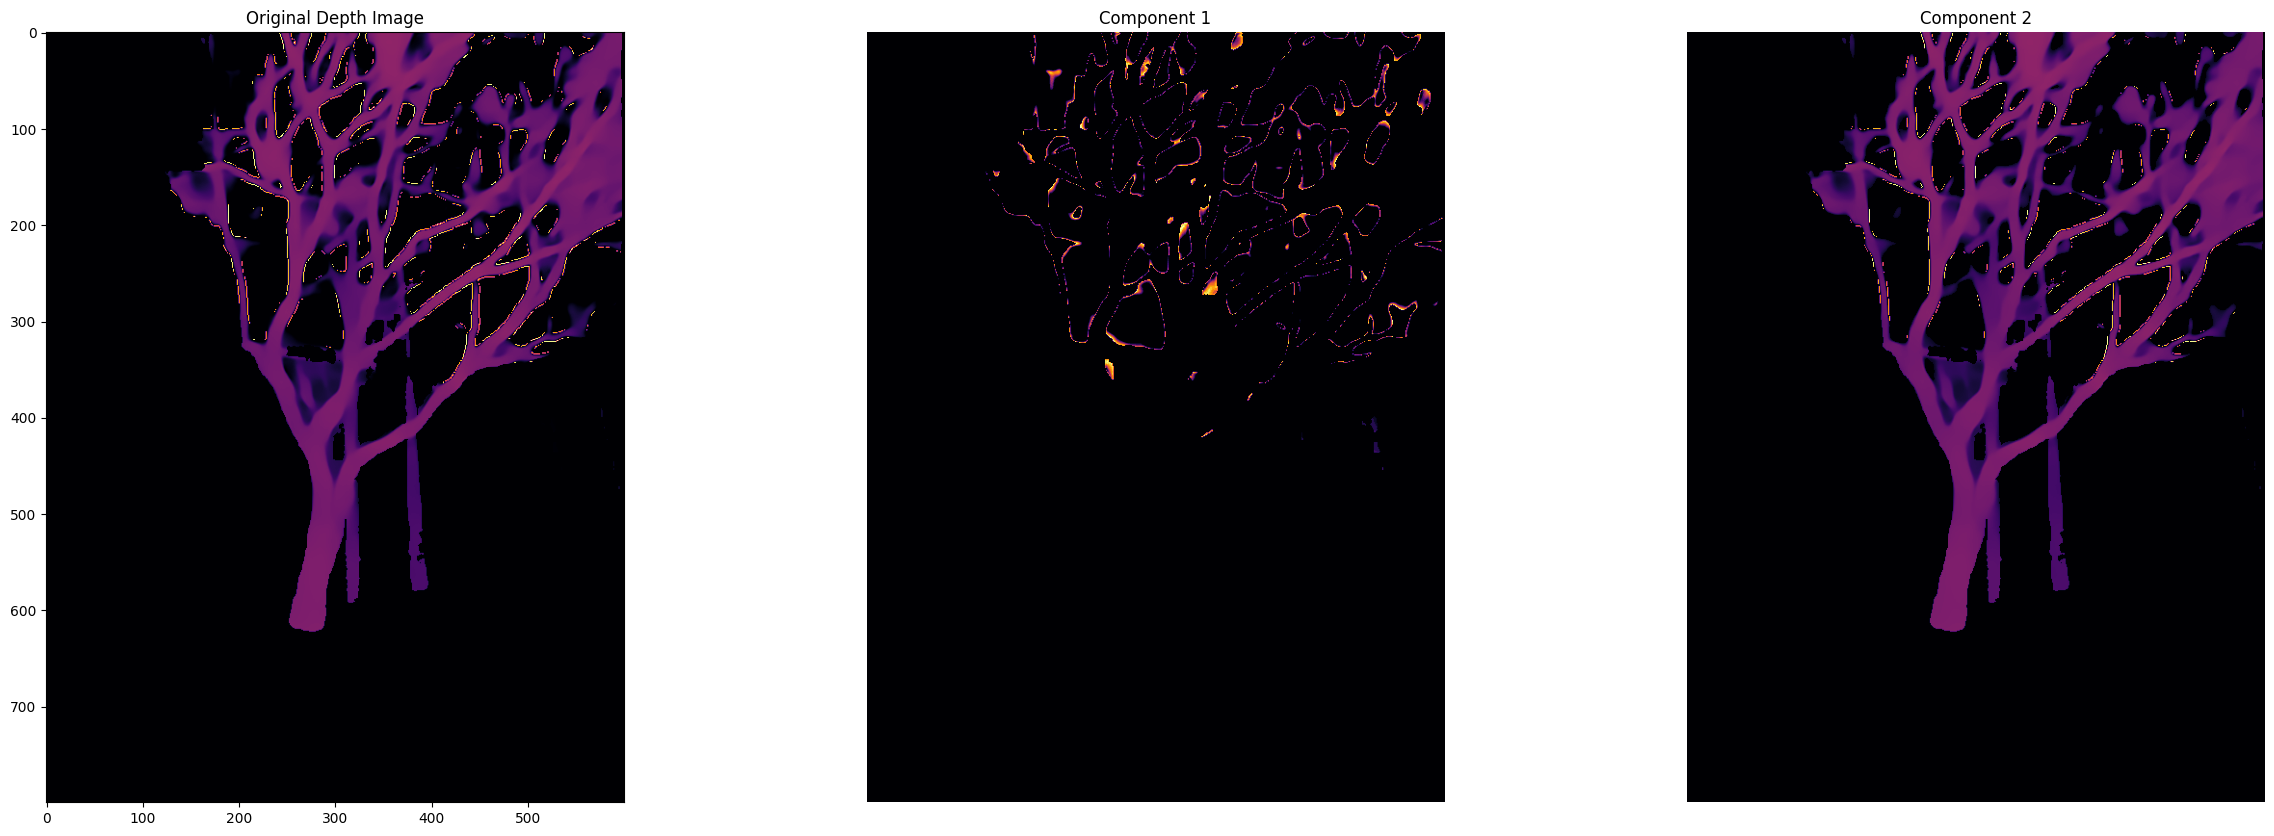

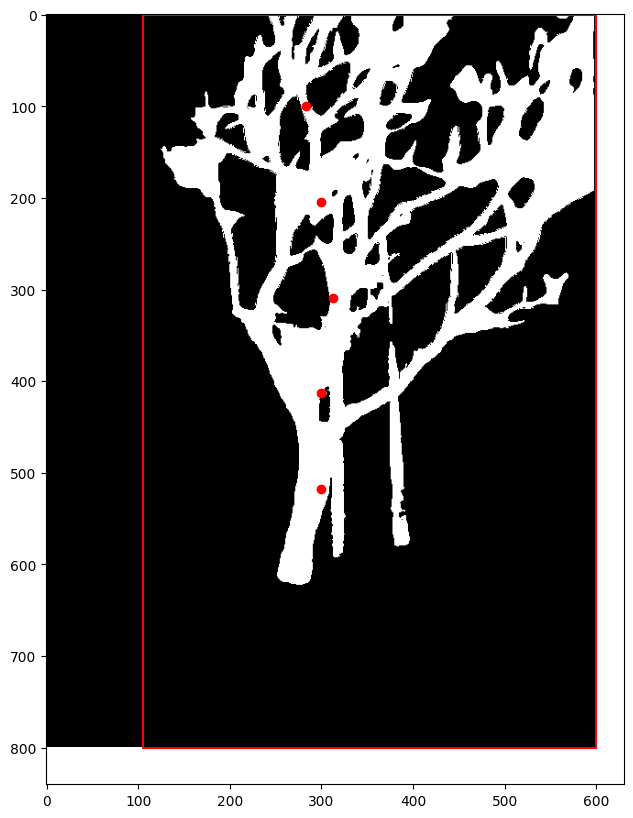

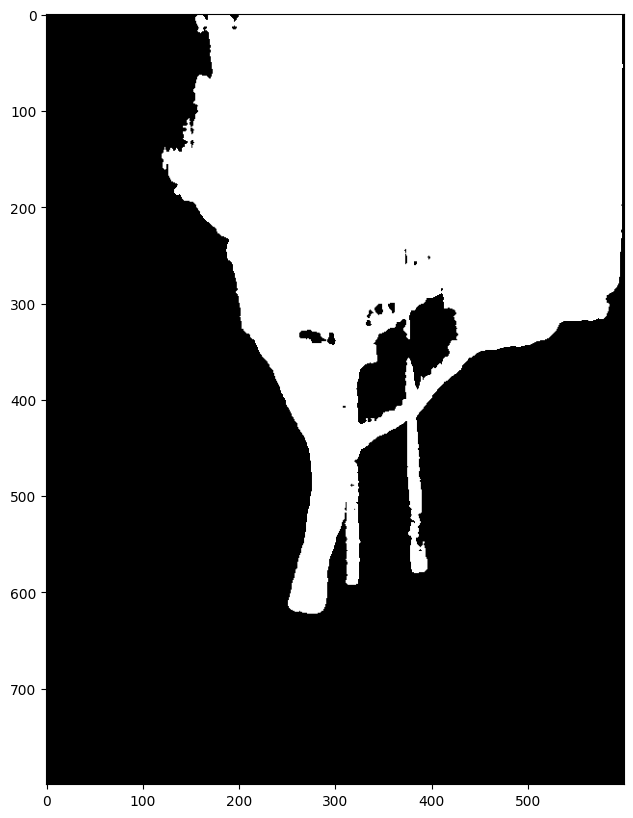

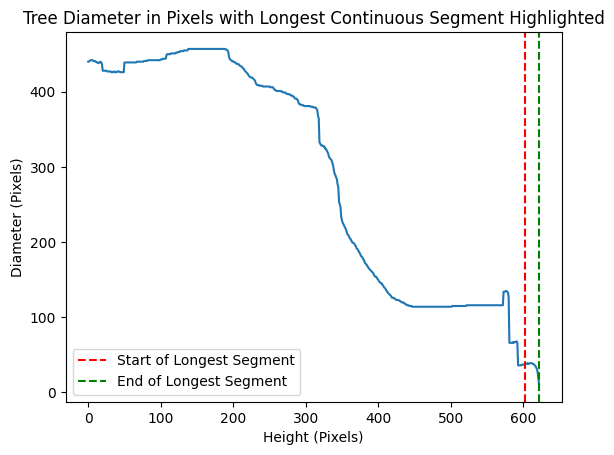

AttributeError: 'TreeMask' object has no attribute 'updated_card_mark'

In [6]:
count = 0

image = next(image_loader.load_image(image_file='12704.jpeg'))

# image = next(image_loader.load_image(image_file='111187-0.jpg'))
# image = next(image_loader.load_image(image_file='133284-0.jpg'))
# image = next(image_loader.load_image(image_file='27012-0.jpg'))
# image = next(image_loader.load_image(image_file='22888-0.jpg'))
# image = next(image_loader.load_image(image_file='14422-0.jpg'))
# image = next(image_loader.load_image(image_file='141591-0.jpg'))
# image = next(image_loader.load_image(image_file='10188.jpeg'))
# image = next(image_loader.load_image(image_file='111187-0.jpg'))
# image = next(image_loader.load_image(image_file='102252-0.jpg')) #failed
# image = next(image_loader.load_image(image_file='86251-0.jpg')) #failed
# image = next(image_loader.load_image(image_file=get_random_image(folder_path)))
tree_image = tree_reviewer.review_tree(image, plot=True)
print(tree_image.error_tags)

In [7]:
tree_image.__dict__

{'tree_image': <tree_reviewer.models.tree_image.TreeImage at 0x2c02dd1dd30>,
 'error_tags': ['Low species confidence'],
 'precision': 2,
 'valid': True,
 'mm_per_pixel': 6.341396049804976,
 'tree_height': 4.12,
 'principal_branches_h': 1.5,
 'dap': 0.41,
 'species': 'Jacaranda',
 'file': '12699.jpeg',
 'shape': (800, 600, 3),
 'classification_score': 0.45,
 'hypothesis_score': 0.88,
 'trunk_xyxy': [0.5, 0.51, 0.69, 0.81],
 'mask_xyxy': [0.0, 0.0, 1.0, 0.81],
 'tree_image_data': {'shape': (800, 600, 3),
  'classification_score': 0.45,
  'hypothesis_score': 0.88,
  'trunk_xyxy': [0.5, 0.51, 0.69, 0.81],
  'mask_xyxy': [0.0, 0.0, 1.0, 0.81]},
 'metrics': {'DAP': 0.41,
  'height': 4.12,
  'principal_branches_height': 1.5,
  'species': 'Jacaranda'}}

In [34]:
import lzstring
import json
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np

# Example base64 encoded compressed data
images_path = "C:/Users/jflir/Documents/Arbocensus/images/20240909002146/"
marks_json_path = "C:/Users/jflir/Documents/Arbocensus/images/20240909002146.json"
marks = json.load(open(marks_json_path))
image_id = list(marks.keys())[80]
compressed_base64_string = marks[image_id]
image_file = images_path + image_id + ".jpeg"

# Load the image
image = Image.open(image_file)

# Add padding if necessary to the compressed base64 string
padding = '=' * (-len(compressed_base64_string) % 4)
compressed_base64_string += padding

# Create an instance of LZString
lz = lzstring.LZString()

# Decompress the string using LZString
decompressed_string = lz.decompressFromBase64(compressed_base64_string)

# string to json
decompressed_string = json.loads(decompressed_string)

points = decompressed_string['lines'][0]['points']
width = decompressed_string['width']
height = decompressed_string['height']
image_width, image_height = image.size
for point in points:
    point['x'] = ((point['x'] / width) + 0.115)*image_width
    point['y'] = ((point['y'] / height) + 0.001)*image_height



decompressed_string

{'lines': [{'points': [{'x': 267.6682046979866, 'y': 649.1962746434564},
    {'x': 267.6682046979866, 'y': 649.1962746434564},
    {'x': 267.6682046979866, 'y': 649.1962746434564}],
   'brushColor': 'rgba(155,12,60)',
   'brushRadius': 4}],
 'width': 558.75,
 'height': 745}

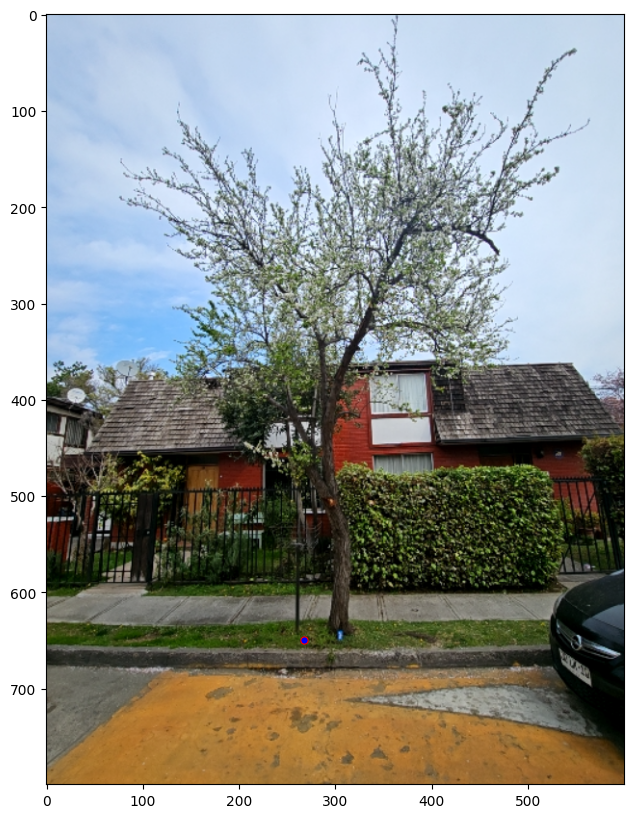

In [36]:
mean_x = np.mean([point['x'] for point in points])
mean_y = np.mean([point['y'] for point in points])

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.plot(mean_x, mean_y, 'ro', markersize=5)
plt.plot([point['x'] for point in points], [point['y'] for point in points], 'bo', markersize=3)
plt.show()